In [904]:
from autograd import grad
import autograd.numpy as np
import matplotlib . pyplot as plt
import copy

In [905]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])  # this is the value of inner product
    return a.T

In [906]:
def least_squares (w,x,y):
    cost = np.sum ((model(x,w)- y)**2)
    return cost/float(y.size)

In [907]:
def my_new(g):
    def my_own_gradient_descent(w):
        grads = []   
        for i in range(len(w)):    # calculate gradients for each parameter
            temp_low = copy.copy(w) 
            temp_high = copy.copy(w) 
            temp_low[i] = temp_low[i] - temp_low[i]*0.0000001  #0.00001 is the 
            temp_high[i] = temp_high[i] + temp_high[i]*0.0000001
            
            value_low = g(temp_low)
            value_high = g(temp_high)
            
            grads.append((value_high - value_low)/(temp_high[i] -temp_low[i] ))
            
        return grads
    return my_own_gradient_descent


In [908]:
def gradient_descent (g, step, max_its ,w, p):
# compute gradient
    gradient = my_new(g)
    weight_history = [w] # weight history
    cost_history = [g(w)] # cost history container

    for k in range(max_its):
        #eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval /np.linalg.norm(grad_eval)
        
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step

        w = w -alpha*grad_eval_norm

        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history , cost_history

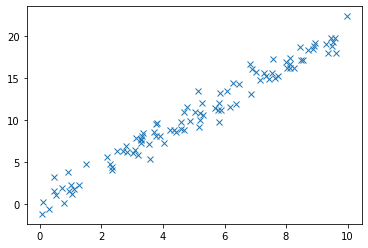

In [925]:
x = 10* np.random.rand(1,100) # row. column
y = .5 + 2*x + np.random.randn(1, 100)

#np.random.rand?
plt.figure(1)
plt.plot(x.T,y.T,'x')

In [926]:
def c(t):
    c = least_squares(t,x,y)
    return c

[0.50029299]
[2.01702103]


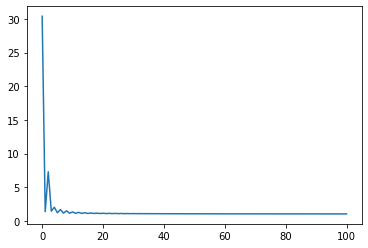

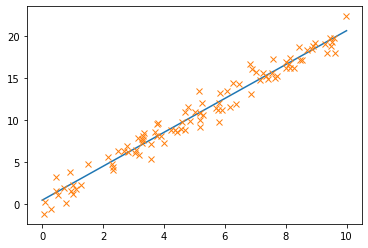

In [927]:
#w = np.array([1,1])
w = np.array ([[1.0], [1.0]])

a, b = gradient_descent(c,'d',100,w,0) #
#print(a)

plt.figure(0)
plt.plot(b)
plt.figure(1)

xp =[0, 10]
plt.plot(xp,a[100][0]+ a[100][1]* xp) #w0 +w1*xp
plt.plot(x.T,y.T,'x')
print(a[100][0])  #this is the array of w0
print(a[100][1])  ##this is the array of w1

In [928]:
print(a[100][0], a[100][1])

[0.50029299] [2.01702103]
